In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
Arts = pd.read_csv('preprocessed_Arts.csv')
Arts.head()

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."
1,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",5/5,4.0,1321833600,Nice Large Basic Safety Pins,****These are your basic large safety pins and...
2,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2B6I0N8RNAQXJ,Allyn C. Cornell,0/0,5.0,1360886400,Great Safety Pins,These Dritz(R) Extra Large Safety Pins are gre...
3,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2FMZ7LFWTZCJ4,Judith A. Holland,0/0,4.0,1360627200,When you need a safety pin...,We are organizing our costume stock and large ...
4,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1AUXDAAZR2VNT,D. M. Albright,0/0,1.0,1358899200,Safety pins,As another reviewer noted these do not pierce ...


In [3]:
Arts.head(1)

,product/productId,product/title,product/price,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."


In [4]:

Arts.columns = ['productid','product_title','price','userid','profileName','helpfulness','score','time','summary','review']

In [5]:
Arts.head(2)

,productid,product_title,price,userid,profileName,helpfulness,score,time,summary,review
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A2PXVMF9DH8NDZ,M. Sarrao,8/8,3.0,1269043200,Not Very Sharp,"Like the previous reviewer, I was very happy t..."
1,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,4.43,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",5/5,4.0,1321833600,Nice Large Basic Safety Pins,****These are your basic large safety pins and...


In [6]:
Arts.drop(['price','helpfulness','profileName','summary','time'],axis =1,inplace = True)

In [7]:
Arts.head(2)

,productid,product_title,userid,score,review
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A2PXVMF9DH8NDZ,3.0,"Like the previous reviewer, I was very happy t..."
1,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A1YUL9PCJR3JTY,4.0,****These are your basic large safety pins and...


In [8]:
from textblob import TextBlob

In [9]:
#sentimental analysis of the text
Arts['polarity'] = Arts['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
Arts['review_len'] = Arts['review'].apply(lambda x:len(x))
Arts['word_count'] = Arts['review'].apply(lambda x: len(x.split()))

In [10]:
Arts.head(2)

,productid,product_title,userid,score,review,polarity,review_len,word_count
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A2PXVMF9DH8NDZ,3.0,"Like the previous reviewer, I was very happy t...",0.013758,539,102
1,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A1YUL9PCJR3JTY,4.0,****These are your basic large safety pins and...,0.129497,671,126


In [11]:
def get_avg_word_len(x):
    words = x.split()
    wordlength = 0
    for word in words:
        wordlength = wordlength + len(word)
        
    return wordlength/len(words)

In [12]:
Arts["avg_wordlength"] = Arts['review'].apply(lambda x: get_avg_word_len(x))

In [13]:
Arts.head(2)

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A2PXVMF9DH8NDZ,3.0,"Like the previous reviewer, I was very happy t...",0.013758,539,102,4.294118
1,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A1YUL9PCJR3JTY,4.0,****These are your basic large safety pins and...,0.129497,671,126,4.333333


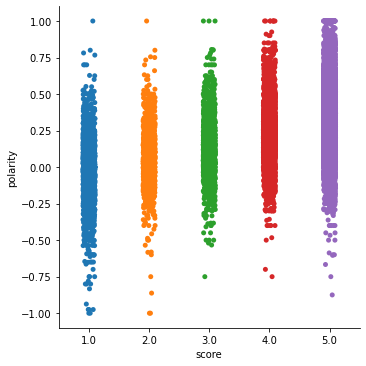

In [14]:
sns.catplot(x='score', y='polarity', data=Arts)

In [15]:
Arts.head(1)

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A2PXVMF9DH8NDZ,3.0,"Like the previous reviewer, I was very happy t...",0.013758,539,102,4.294118


In [16]:
rating_pivot_table = Arts.pivot_table(index="userid",columns= "productid",values="score").fillna(0)

## Piot table between the userid and productid with values ratings

In [17]:
rating_pivot_table

productid,0618307222,087659223X,0922705380,0930113187,0970113706,1564772829,1574863185,1574864246,1892127180,1929180802,...,B000QHH03W,B000RB1Y5W,B000RB3GI0,B000TB6EHS,B000TBA6EK,B000TC07HK,B000TC3VQY,B000TKQAJQ,B000UYDG1Q,B0017RCLLQ
userid,,,,,,,,,,,,,,,,,,,,,
A002211213O7OZD4NB6T4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00890531BOEEDK31WCBE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01676021JTRZ0XE5YS4A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03007643BIO3UI6ZO6ZR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03043323VAO4JWT2G7HF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZYQ60ZR354HC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZYUK4V2OENUZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZZ1R8ITZ43KJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


sklearn.metrics.pairwise_distances can be used to compute distance between all pairs of users. pairwise_distances() takes a metric parameter for what distance measure to use. Using the  cosine similarity for finding similarity among users. 

In [18]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

## The Cosine distance from all the Pairs of  Users 

In [19]:
distance = pairwise_distances(rating_pivot_table,metric="cosine")
distance
x= pd.DataFrame(np.squeeze(distance))
x

,0,1,2,3,4,5,6,7,8,9,...,20679,20680,20681,20682,20683,20684,20685,20686,20687,20688
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20684,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
20685,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
20686,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
20687,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0


## users who are similar to user with user id 'A002211213O7OZD4NB6T4' , index=0

In [20]:
i = int(input("enter the userid index in the pairwise distance : "))

enter the userid index in the pairwise distance : 1


## Tp 5 user id index corresponding to the i userid

In [21]:
top5 = x.loc[i].sort_values(ascending = True)
pd.DataFrame(top5[0:5])

,1
3778,0.0
434,0.0
10895,0.0
18242,0.0
8803,0.0


In [22]:
allusers=rating_pivot_table.values
user2=allusers[0]    # user1 with userid 'A00890531BOEEDK31WCBE'
den1=np.sqrt(sum([np.square(x) for x in user2]))
cosinesim=[(10,1)]
i=1
for user in allusers[1:]:
    numer=[x*y for x,y in zip(user2,user)]
    den2=np.sqrt(sum([np.square(x) for x in user]))
    costheta = sum(numer)/(den1*den2)
    cosinesim.append((rating_pivot_table.index[i],costheta))
    i=i+1
cosinesim.sort(key=lambda x:x[1],reverse =True)
simusers=cosinesim[0:6]
simusers


[(10, 1),
 ('A109WX953UP263', 1.0),
 ('A10CRW7XRJBJ2G', 1.0),
 ('A11D57EEJXG1TQ', 1.0),
 ('A1C8NAHYR6Z10F', 1.0),
 ('A1DD17P0XAXWLC', 1.0)]

In [23]:
Arts.head(1)

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
0,B000G6HRZE,Dritz(R) Extra Large Safety Pins-Size 3 65/Pkg,A2PXVMF9DH8NDZ,3.0,"Like the previous reviewer, I was very happy t...",0.013758,539,102,4.294118


In [24]:
user = Arts[Arts['userid']=='A2D1LPEUCTNT8X']
user

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
790,B000B7OSTG,"Fiskars 93518097J, Decorative Rotary Blades, P...",A2D1LPEUCTNT8X,4.0,I use rotary blades for decorative cuts used i...,0.089528,638,116,4.508621
1676,B00083QUQ2,Rotary Blade Sharpener- For 45mm Blades,A2D1LPEUCTNT8X,4.0,"I use my rotary cutter for quilting fabric, cu...",-0.117157,1364,239,4.711297
2463,B000BI7KQS,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762
5384,B0006SDOCM,Olfa 28mm Rotary Blade Refill- 5 per Package,A2D1LPEUCTNT8X,5.0,I had my Olfa rotary blade for over 10 years. ...,-0.048493,1815,319,4.692790
5463,B000BI3KQW,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762
5751,B000FAHD0U,June Tailor 18-Inch-by-6-1/2-Inch Fancy Frame ...,A2D1LPEUCTNT8X,5.0,Scallops borders on quilts and throws look bea...,0.351566,915,175,4.234286
5796,B00083ON9S,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5803,B00083ONAC,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5834,B00083ONC0,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5840,B00083OND4,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077


In [25]:
user.head()

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
790,B000B7OSTG,"Fiskars 93518097J, Decorative Rotary Blades, P...",A2D1LPEUCTNT8X,4.0,I use rotary blades for decorative cuts used i...,0.089528,638,116,4.508621
1676,B00083QUQ2,Rotary Blade Sharpener- For 45mm Blades,A2D1LPEUCTNT8X,4.0,"I use my rotary cutter for quilting fabric, cu...",-0.117157,1364,239,4.711297
2463,B000BI7KQS,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762
5384,B0006SDOCM,Olfa 28mm Rotary Blade Refill- 5 per Package,A2D1LPEUCTNT8X,5.0,I had my Olfa rotary blade for over 10 years. ...,-0.048493,1815,319,4.692790
5463,B000BI3KQW,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762


In [26]:
user.score.value_counts()

5.0    31
4.0     4
3.0     1
2.0     1
Name: score, dtype: int64

In [27]:
top_ratings = user[user['score']==5.0]
top_ratings

,productid,product_title,userid,score,review,polarity,review_len,word_count,avg_wordlength
2463,B000BI7KQS,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762
5384,B0006SDOCM,Olfa 28mm Rotary Blade Refill- 5 per Package,A2D1LPEUCTNT8X,5.0,I had my Olfa rotary blade for over 10 years. ...,-0.048493,1815,319,4.692790
5463,B000BI3KQW,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762
5751,B000FAHD0U,June Tailor 18-Inch-by-6-1/2-Inch Fancy Frame ...,A2D1LPEUCTNT8X,5.0,Scallops borders on quilts and throws look bea...,0.351566,915,175,4.234286
5796,B00083ON9S,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5803,B00083ONAC,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5834,B00083ONC0,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5840,B00083OND4,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
5855,B00083ONI4,American & Efird Maxilock Cone Thread (3000 Ya...,A2D1LPEUCTNT8X,5.0,Maxi-lock thread is a good quality thread and ...,0.349524,1652,312,4.298077
6719,B000BI5D4E,Sulky Rayon Thread (40 Weight) 250 Yards - in ...,A2D1LPEUCTNT8X,5.0,Sulky thread is my favorite thread - it has a ...,0.440079,567,101,4.623762


In [28]:
top_ratings['product_title'].value_counts()

Sulky Rayon Thread (40 Weight) 250 Yards - in your choice of color               11
American & Efird Maxilock Cone Thread (3000 Yards) - in your choice of colors    11
Fons & Porter 8-Inch-by-14-Inch Rotary Cutting Ruler                              1
Fiskars 12-93007097J Paper Edgers Set Classic                                     1
Olfa 28mm Rotary Blade Refill- 5 per Package                                      1
Colonial Needle - Big Eye Quilting Hand Needles - 12/Pkg                          1
Light Box 10" X 12"                                                               1
Clover Triangle Tailors Chalk                                                     1
June Tailor 18-Inch-by-6-1/2-Inch Fancy Frame Decorative Quilt Borders            1
Fiskars 9528 45mm Rotary Cutter Blades, 5-Pack                                    1
Bernina Metal Bobbins 5/pkg.                                                      1
Name: product_title, dtype: int64

In [29]:
top_ratings_1 =pd.DataFrame(top_ratings[0:5])

In [30]:
top_ratings_1['productid']

2463    B000BI7KQS
5384    B0006SDOCM
5463    B000BI3KQW
5751    B000FAHD0U
5796    B00083ON9S
Name: productid, dtype: object

In [ ]:

allusers=rating_pivot_table.values
user2=allusers[1]    # user1 with userid 'A00890531BOEEDK31WCBE'
den1=np.sqrt(sum([np.square(x) for x in user2]))
cosinesim=[(10,1)]
i=1
for user in allusers[1:]:
    numer=[x*y for x,y in zip(user2,user)]
    den2=np.sqrt(sum([np.square(x) for x in user]))
    costheta = sum(numer)/(den1*den2)
    cosinesim.append((rating_pivot_table.index[i],costheta))
    i=i+1
cosinesim.sort(key=lambda x:x[1],reverse =True)
simusers=cosinesim[0:6]
simusers


In [ ]:
for i in (Arts[Arts['userid']=='A00890531BOEEDK31WCBE'].productid):
    for j in (Arts[Arts['userid']=='A104PW5AXKTPNL'].productid):
        if(i==j):
            print(i)

In [ ]:
Arts[Arts['userid']=='A00890531BOEEDK31WCBE']

In [ ]:
Arts.userid.value_counts()

In [ ]:
allusers.shape

In [ ]:
user_high = Arts['userid'] =='A2D1LPEUCTNT8X'

In [ ]:
Arts[user_high]

In [ ]:
allusers=rating_pivot_table.values
user_high=allusers[0]
den1=np.sqrt(sum([np.square(x) for x in user_high]))
cosinesim=[(10,1)]
i=1
for user in allusers[1:]:
    numer=[x*y for x,y in zip(user_high,user)]
    den2=np.sqrt(sum([np.square(x) for x in user]))
    costheta = sum(numer)/(den1*den2)
    cosinesim.append((rating_pivot_table.index[i],costheta))
    i=i+1
cosinesim.sort(key=lambda x:x[1],reverse =True)
simusers=cosinesim[0:6]
simusers

In [ ]:
for i in (Arts[Arts['userid']=='A2D1LPEUCTNT8X'].productid):
    for j in (Arts[Arts['userid']=='A109WX953UP263'].productid):
        if(i==j):
            print(i)